# TRỰC QUAN, PHÂN TÍCH VÀ DỰ ĐOÁN DOANH SỐ BÁN HÀNG CỦA MỘT SIÊU THỊ TẠI THỊ TRƯỜNG MỸ

Danh sách thành viên nhóm 1 - S2:

| MSSV | Họ và Tên |
| --- | :-- |
| 20133076 | Văn Mai Thanh Nhật |
| 20133082 | Huỳnh Minh Phước |
| 20133013 | Trần Nguyên Hạnh |
| 20133035 | Trần Đông |


## Phần 1.Nhập dữ liệu

In [46]:
#install requirements package
# pip install -r requirements.txt

In [47]:
#import the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import missingno as msno
import warnings
import statsmodels.api as sm

warnings.filterwarnings('ignore')

In [48]:
df = pd.read_csv('train.csv') #Read the dataset

**Nhìn tổng quát dữ liệu**

In [49]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [50]:
df.describe() #Describing the data 

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Phần 2. Tiền xử lý
### 2.1 Chuẩn hóa dữ liệu

In [51]:
df.drop('Row ID',axis = 1, inplace = True) #Dropping the Row ID column
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y', errors= 'ignore') #convert Order dates to pandas datetime format
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y', errors= 'ignore')   #convert shipping dates to pandas datetime format
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True)
#setting the index to be the date will help us a lot later on
df.set_index("Order Date", inplace = True)

### 2.2 Xử lý dữ liệu bị thiếu

**Ma trận dữ liệu bị thiếu**

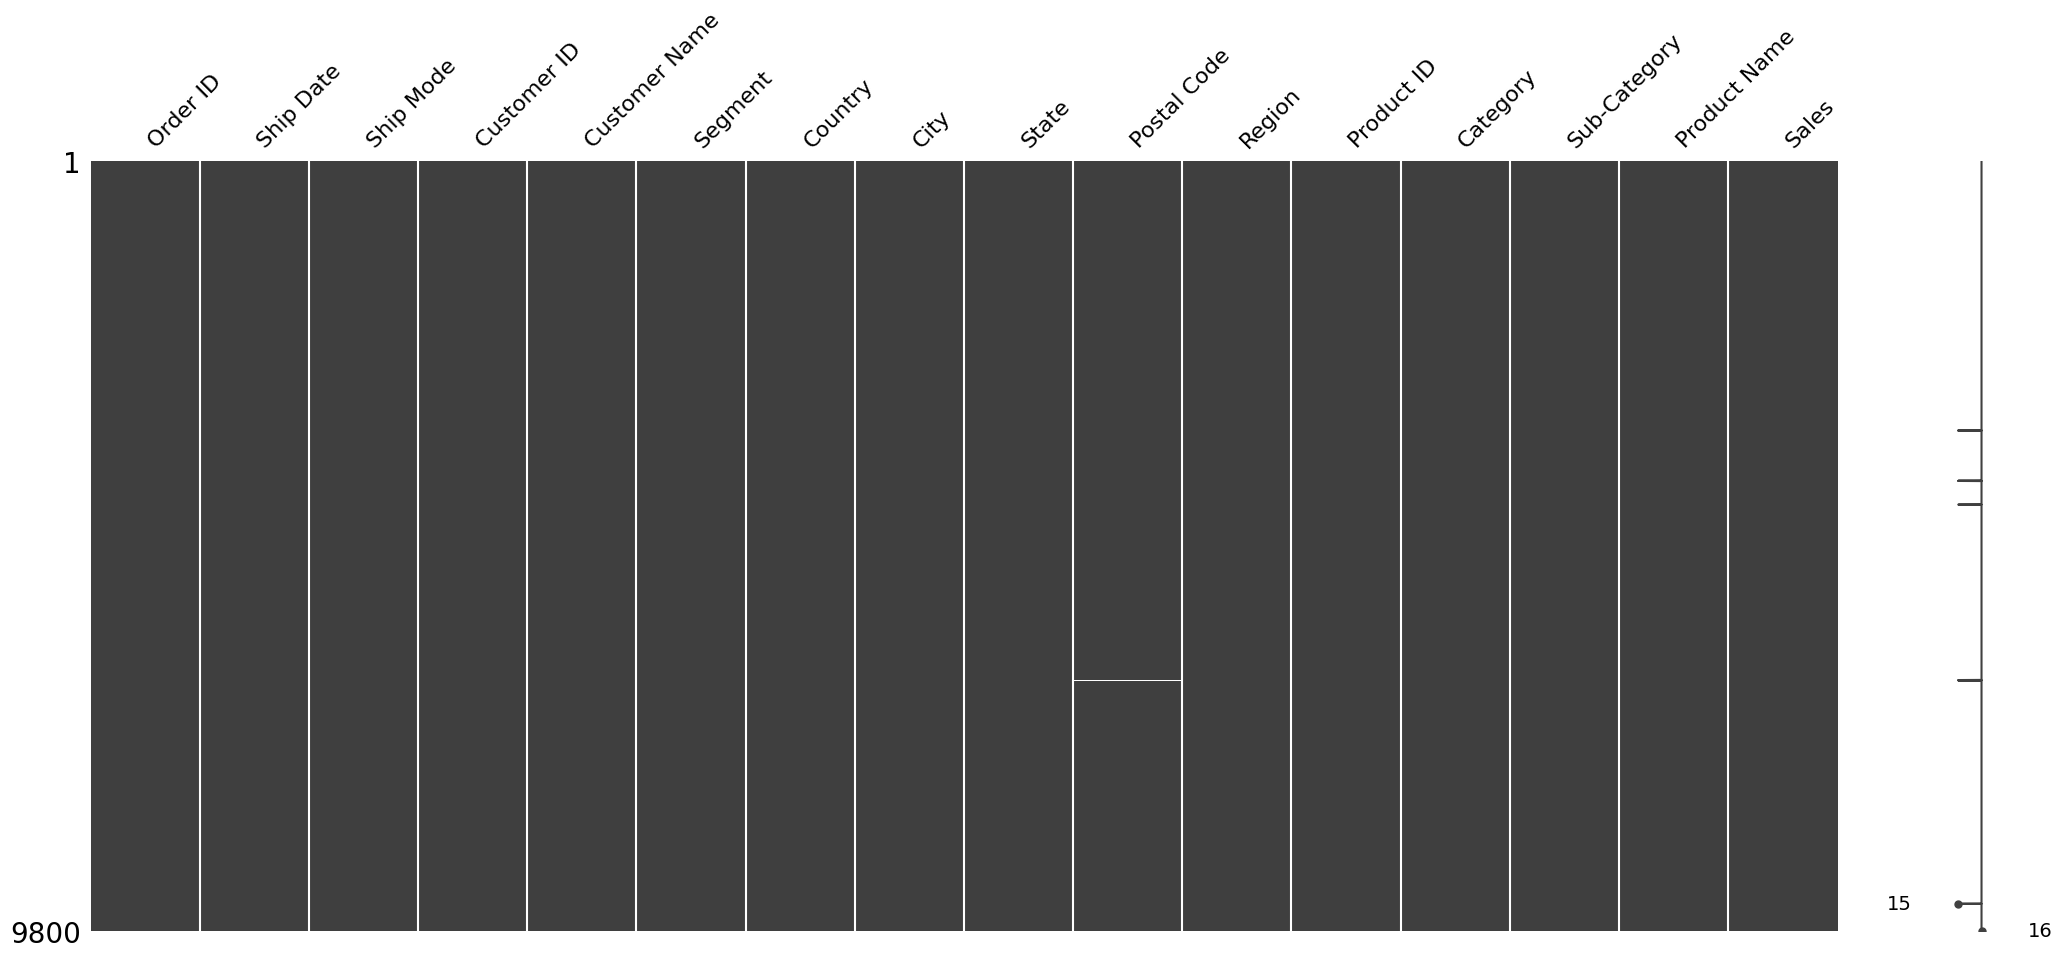

<Figure size 1500x900 with 0 Axes>

In [52]:
# BIỄU DIỄN NHỮNG THUỘC TÍNH BỊ THIẾU
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

In [53]:
print(df.isnull().sum())

Order ID          0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [54]:
df[df['Postal Code'].isnull()]

,Order ID,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Order Date,,,,,,,,,,,,,,,,
2016-11-07,CA-2016-162887,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
2016-11-08,CA-2016-117086,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
2017-01-23,US-2017-165505,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
2017-04-06,US-2017-150140,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
2018-01-19,US-2018-127292,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28


**Xử lý dữ liệu bị thiếu**

In [55]:
df['Postal Code'] = df['Postal Code'].fillna(5401) # Postal code for Burlington city

**Kiểm tra 1 lần nữa**

In [56]:
print(df.isnull().sum())

Order ID         0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


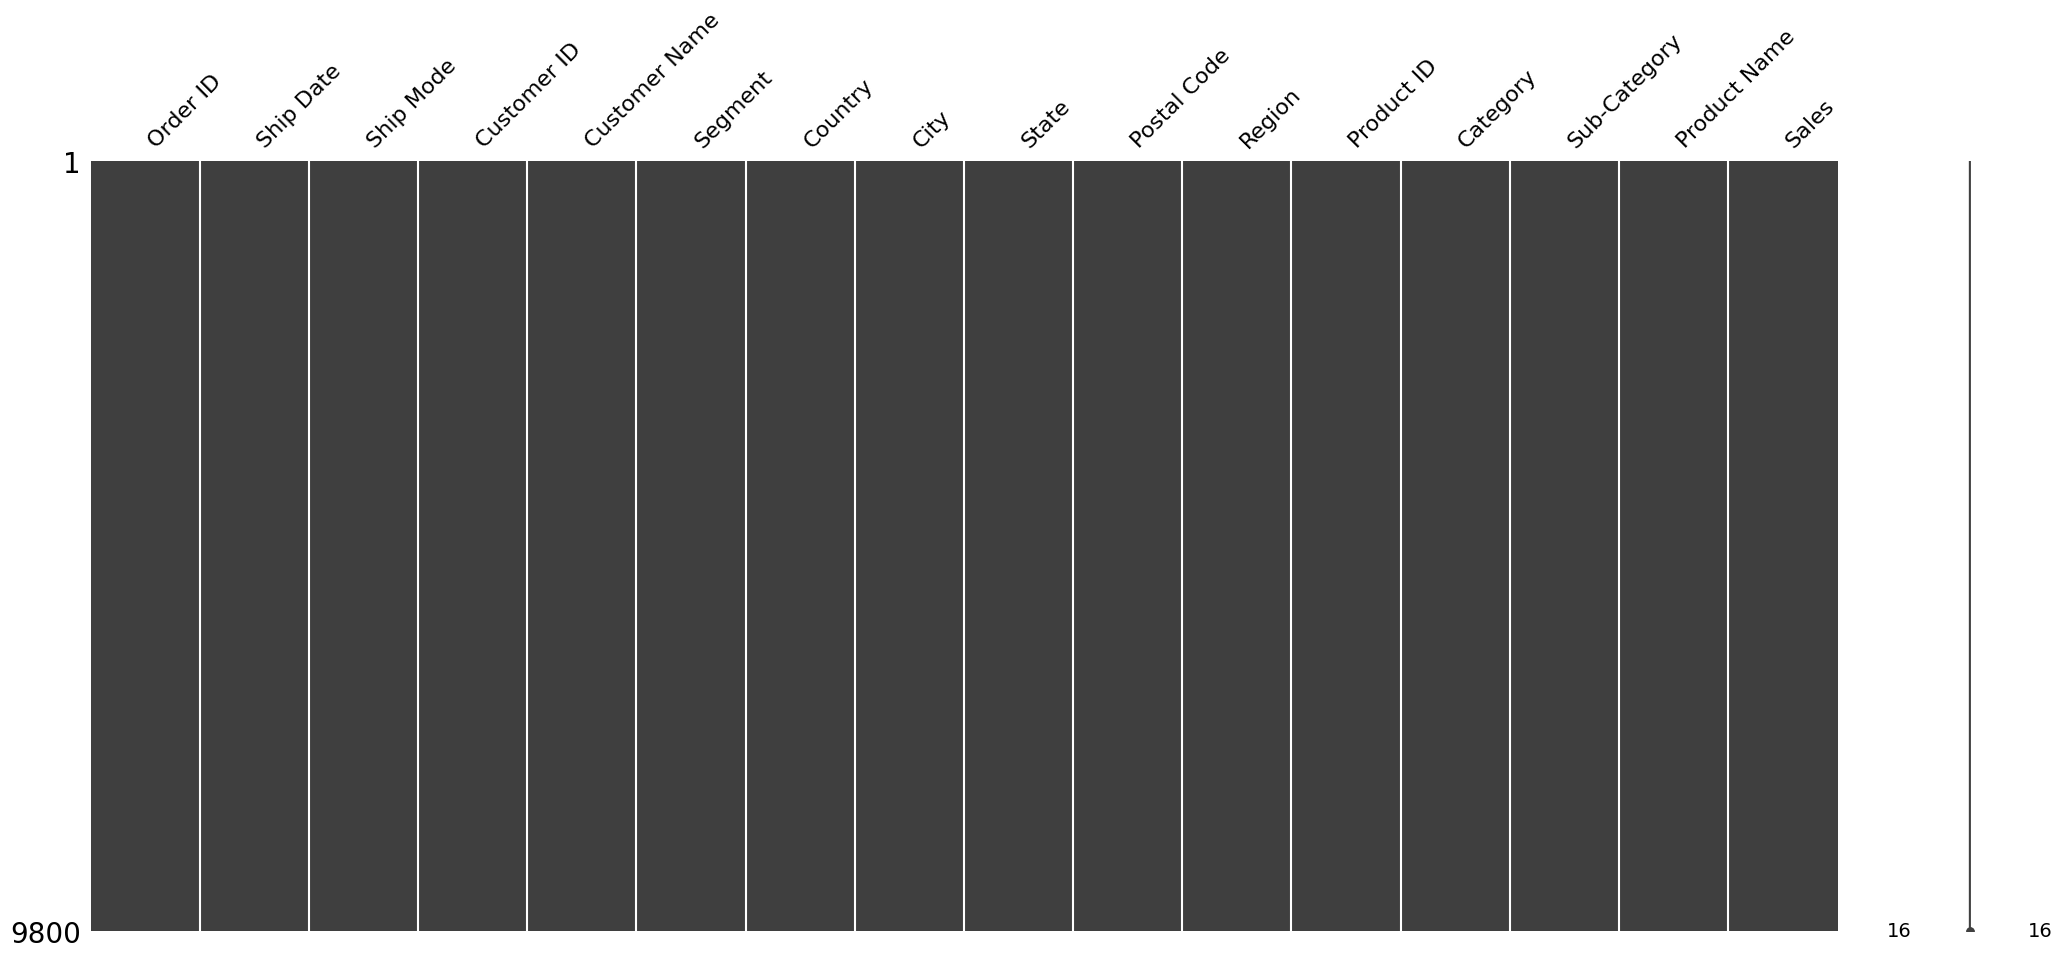

<Figure size 1500x900 with 0 Axes>

In [57]:
msno.matrix(df)
plt.figure(figsize = (15,9))
plt.show()

## Phần 3 - Trực quan hóa dữ liệu
### 3.1 Thống kê theo Khách hàng:

**Những Khách hàng có doanh số cao nhất**

In [58]:
Top_customers = df.groupby(["Customer Name"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the Customers as per the sales
Top_customers = Top_customers[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_customers.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the customer name into dataframe 
# Top_customers.head()

In [59]:
import plotly.express as px
fig = px.bar(Top_customers, x = 'Customer Name', y = 'Sales', text_auto=True )
fig.show()

**Tỷ lệ doanh thu theo từng phân khúc khách hàng**

In [60]:
Top_segment = df.groupby(["Segment"]).sum().sort_values("Sales", ascending=False) # Sort the segment as per the sales
Top_segment = Top_segment[["Sales"]] # keep only the sales column in the dataframe
Top_segment.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the segment column into the data frame
total_revenue_segement = Top_segment["Sales"].sum() # To find the total revenue generated as per segment
total_revenue_segement = str(int(total_revenue_segement)) # Convert the total_revenue_segment from float to int and then to string
total_revenue_segement= '$' + total_revenue_segement # Adding '$' sign before the Value
# Top_segment

In [61]:
fig = px.pie(Top_segment, labels='Segment', values='Sales', hole=.5, names = 'Segment')
# fig.update_layout(height = 800)
fig.show()

### 3.2 Thống kê theo vị trí địa lý:

**Những Tiểu bang có doanh số cao nhất**

In [62]:
Top_states = df.groupby(["State"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_states = Top_states[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_states.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the states into dataframe
# Top_states.head()

In [63]:
import plotly.express as px
fig = px.bar(Top_states, x = 'State', y = 'Sales', text_auto=True )
fig.show()

**Những Thành phố có doanh số cao nhất**

In [64]:
Top_cities = df.groupby(["City"]).sum().sort_values("Sales", ascending=False).head(20) # Sort the States as per the sales
Top_cities = Top_cities[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_cities.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the cities into the dataframe

In [65]:
import plotly.express as px
fig = px.bar(Top_cities, x = 'City', y = 'Sales', text_auto=True )
fig.show()

**Tỷ lệ doanh thu theo từng vùng miền**

In [66]:
Top_region = df.groupby(["Region"]).sum().sort_values("Sales", ascending=False) # Sort the Region as per the sales
Top_region = Top_region[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_region.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Region column into the data frame

In [67]:
fig = px.pie(Top_region, labels='Region', values='Sales', hole=.5, names = 'Region')
# fig.update_layout(height = 800)
fig.show()

**Tỷ lệ doanh thu theo từng phương thức vận chuyển**

In [68]:
Top_shipping = df.groupby(["Ship Mode"]).sum().sort_values("Sales", ascending=False) # Sort the Shipping modes as per the sales
Top_shipping = Top_shipping[["Sales"]] # keep only the sales column in the dataframe
Top_shipping.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the Ship Mode column into the data frame
total_revenue_ship = Top_segment["Sales"].sum() # To find the total revenue generated as per shipping mode
total_revenue_ship = str(int(total_revenue_ship)) # Convert the total_revenue_ship from float to int and then to string
total_revenue_ship = '$' + total_revenue_ship # Adding '$' sign before the Value

In [69]:

fig = px.pie(Top_shipping, labels='Ship Mode', values='Sales', hole=.5, names = 'Ship Mode')
# fig.update_layout(height = 800)
fig.show()

### 3.2 Thống kê theo thông tin sản phẩm:

**Những sản phẩm có doanh số cao nhất**

In [70]:
Top_products = df.groupby(["Product Name"]).sum().sort_values("Sales",ascending=False).head(20) # Sort the product names as per the sales
Top_products = Top_products[["Sales"]].round(2) # Round off the Sales Value up to 2 decimal places
Top_products.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add the product names into the dataframe
total_revenue_products = Top_products["Sales"].sum() # To find the total revenue generated by all the top products
total_revenue_products = str(int(total_revenue_products)) # Convert the total_revenue_products from float to int and then to string
total_revenue_products = '$' + total_revenue_products # Adding '$' sign before the Value
# Top_products

In [71]:
import plotly.graph_objects as go

# Use `hole` to create a donut-like pie chart
# fig = go.Figure(data=[go.Pie(labels=Top_products['Product Name'], values=Top_products['Sales'], hole=.5, pull=[0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03],  )])
fig = px.pie(Top_products, labels='Product Name', values='Sales', hole=.5, names = 'Product Name')

fig.show()

**Tỷ lệ doanh thu theo từng danh mục, danh mục phụ**

In [72]:
# Sort both category and  sub category as per the sales
Top_subcat = df.groupby(['Category','Sub-Category']).sum().sort_values("Sales", ascending=False).head(10)
Top_subcat = Top_subcat[["Sales"]].astype(int) # Cast Sales column to integer data type
Top_subcat = Top_subcat.sort_values("Category") # Sort the values as per Category
Top_subcat.reset_index(inplace=True) # Since we have used groupby, we will have to reset the index to add both columns into data frame
Top_subcat_1 = Top_subcat.groupby(['Category']).sum() # Calculated the total Sales of all the categories
Top_subcat_1.reset_index(inplace=True) # Reset the index
# Top_subcat.head(10)

In [73]:
import plotly.graph_objects as go

# fig =go.Figure(go.Sunburst(
#     labels=Top_subcat['Category'],
#     parents=Top_subcat['Sub-Category'],
#     values=Top_subcat['Sales'],
# ))
# fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))
fig = px.sunburst(Top_subcat, path=['Category', 'Sub-Category'], color='Sales', color_continuous_scale=px.colors.sequential.Greens, labels='Sales')

fig.show()

### 3.4 Bản đồ doanh thu từng tiêu bảng toàn nước Mỹ:

In [74]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [75]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = df.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales.drop('Postal Code',1, inplace = True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['Staate Code'])

KeyError: 'Staate Code'

In [ ]:
import plotly.graph_objects as go

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(
    locations=sales['State Code'], # Spatial coordinates
    text=sales['text'],
    z = sales['Sales'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Sales",
    
))

fig.update_layout(
    title_text = 'Sales',
    geo_scope='usa', # limite map scope to USA
)

fig.show();

In [ ]:
cate_sales_datetime = df.groupby(['Category','Order Date'])['Sales'].sum().reset_index() 
cate_sales_datetime = cate_sales_datetime.set_index('Order Date')
cate_sales_datetime = cate_sales_datetime.groupby('Category')['Sales'].resample('MS').sum().reset_index()

fig_cate_datetime = px.line(cate_sales_datetime,x='Order Date',y='Sales',color='Category')
fig_cate_datetime.update_layout(
    title = 'Doanh thu mặt hàng theo thời gian',
    xaxis_title = 'Thời gian',
    yaxis_title = 'Doanh thu'
)
fig_cate_datetime.show()

## Phần 4. Xây dựng mô hình dự đoán 
### 4.1 Chuẩn bị tập dữ liệu

In [ ]:
new_data = pd.DataFrame(df['Sales'])
new_data

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,20.720
2018-12-30,323.136
2018-12-30,209.300


pandas.core.frame.DataFrame

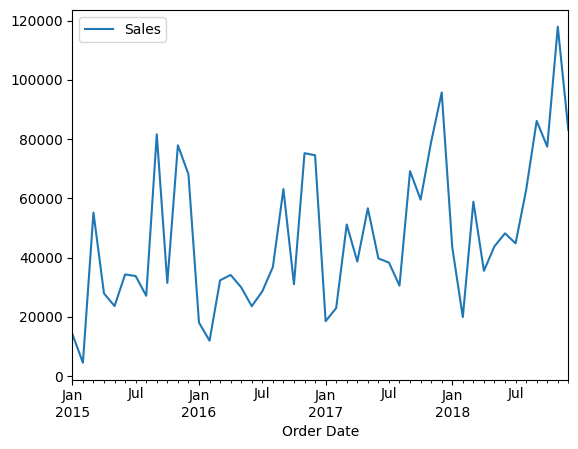

In [76]:
#Plotting the data to understand the sales distribution from the year 2015-2018
new_data.plot();
type(new_data)

### 4.2 Kiểm tra tính dừng

In [77]:
# # Checkting for Stationarity
new_data =  pd.DataFrame(new_data['Sales'].resample('MS').sum())
# new_data = new_data.interpolate(method='linear') #The interpolate() function is used to interpolate values according to 
#different methods. It ignore the index and treats the values as equally spaced.
# new_data = new_data.set_index(level = 0, inplace= True )
# new_data['Sales']['2014']
# test_data = new_data.squeeze()

### 4.2. Mô hình dự đoán chuỗi thời gian SARIMA

In [78]:
# import itertools
# p = d = q = range(0, 2) 
# pdq = list(itertools.product(p, d, q))
# seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
# print('Examples of parameter combinations for Seasonal ARIMA:')
# print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
# print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
# print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
# print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

In [79]:
# min_aic = 999999999
# for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
#     for seasonal_param in seasonal_pdq_comb:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(new_data,
#                                             order=parameters,
#                                             seasonal_param_order=seasonal_param,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False) #determines the AIC value of the model**
#             results = mod.fit(disp=0);
#             # print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
#             if results.aic <= min_aic:
#                 min_aic = results.aic
#                 best_parameters = parameters
#                 best_seasonal_param = seasonal_param
#         except:
#             continue
# print('least aic: {}, param = {}, seaonal_param = {}'.format( min_aic, best_parameters, best_seasonal_param))
# # %%captures
# # **The Akaike information criterion (AIC) is an estimator of out-of-sample prediction error and thereby relative 
# # quality of statistical models for a given set of data. AIC estimates the relative amount of information lost 
# # by a given model. The less information a model loses, the higher the quality of that model.        

In [80]:
# After choosing the combination of seasonal parameters with least AIC value, let us train the SARIMA model
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_invertibility=False) #model defintion
results = mod.fit(disp=0) #model fitting
print(results.summary().tables[1]) # displaying the result 

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5094      0.234      2.179      0.029       0.051       0.968
ma.L1         -0.9007      0.185     -4.871      0.000      -1.263      -0.538
ar.S.L12      -0.0152      0.558     -0.027      0.978      -1.109       1.079
ma.S.L12      -0.4640      0.622     -0.746      0.456      -1.683       0.755
sigma2      2.308e+08   1.24e-09   1.86e+17      0.000    2.31e+08    2.31e+08


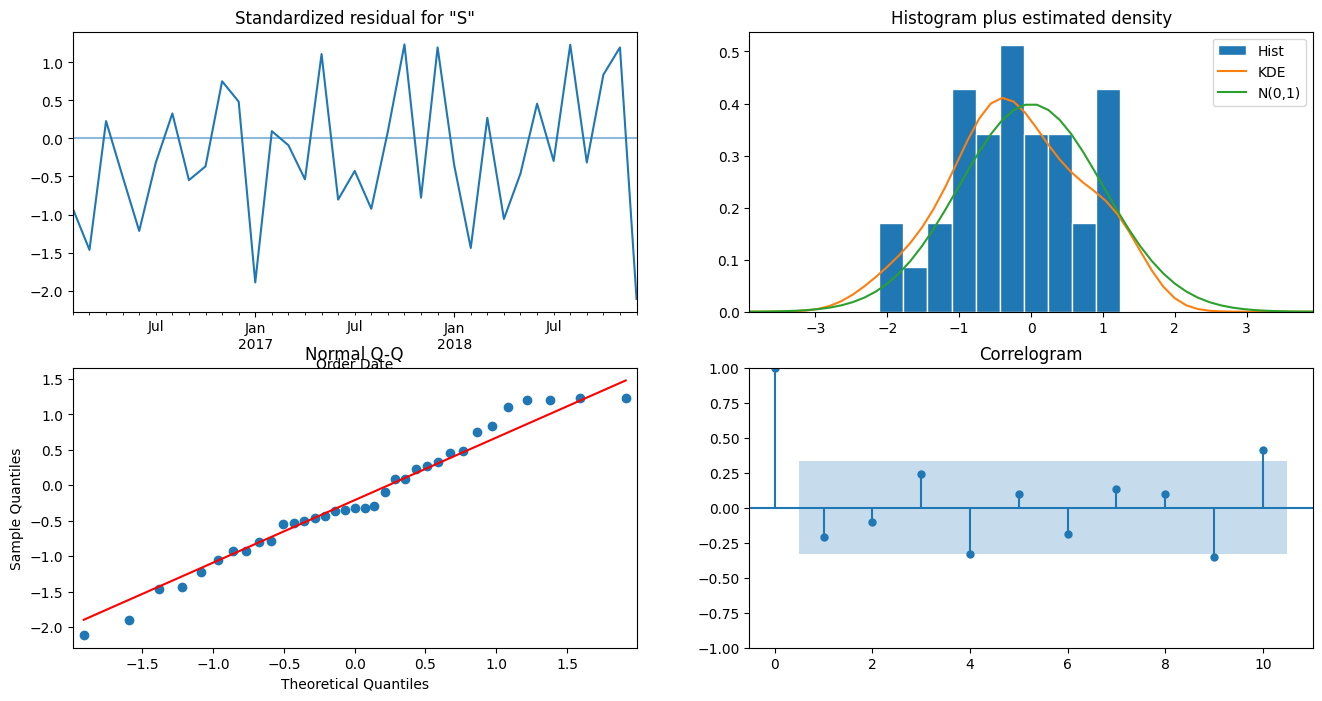

In [81]:
results.plot_diagnostics(figsize=(16, 8)) #Produces a plot grid of: 1. Standardized residuals over time 
# 2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line and, 4. Correlogram.
plt.show()

In [82]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-03'), dynamic=False) # variable to display plot for predicted values
# pred_val = pred.conf_int()
ax = new_data.plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
# ax.fill_between(pred_val.index,
#                 pred_val.iloc[:, 0],
#                 pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [271]:
y_forecasted = pred.predicted_mean
y_truth = new_data['Sales']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error of the forecasts is 267.66


In [272]:
# mod = sm.tsa.statespace.SARIMAX(new_data,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False) #model defintion
# results = mod.fit() #model fitting

forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('int')) #displays the sales forecast as type integer

2018-12-31    229
2019-01-01    241
2019-01-02    244
2019-01-03    229
2019-01-04    196
2019-01-05    255
2019-01-06    223
Freq: D, Name: predicted_mean, dtype: int64


In [273]:
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv',index=False) # saving the output as a csv file with name 'prediction.csv'

In [274]:
prophet_data = new_data.copy()
prophet_data.reset_index(level=0, inplace=True) # converting the index to column
prophet_data.columns = ['ds', 'y']
prophet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1458 non-null   datetime64[ns]
 1   y       1458 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 22.9 KB


In [275]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = prophet_data['y'].quantile(0.25)
Q3 = prophet_data['y'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
 
# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(prophet_data['y']>=upper)[0]
lower_array = np.where(prophet_data['y']<=lower)[0]
 
# Removing the outliers
prophet_data.drop(index=upper_array, inplace=True)
prophet_data.drop(index=lower_array, inplace=True)

In [276]:
from prophet import Prophet 
m = Prophet()
m.fit(prophet_data)

00:21:25 - cmdstanpy - INFO - Chain [1] start processing
00:21:25 - cmdstanpy - INFO - Chain [1] done processing


In [277]:
future = m.make_future_dataframe(periods=100)
forecast = m.predict(future)

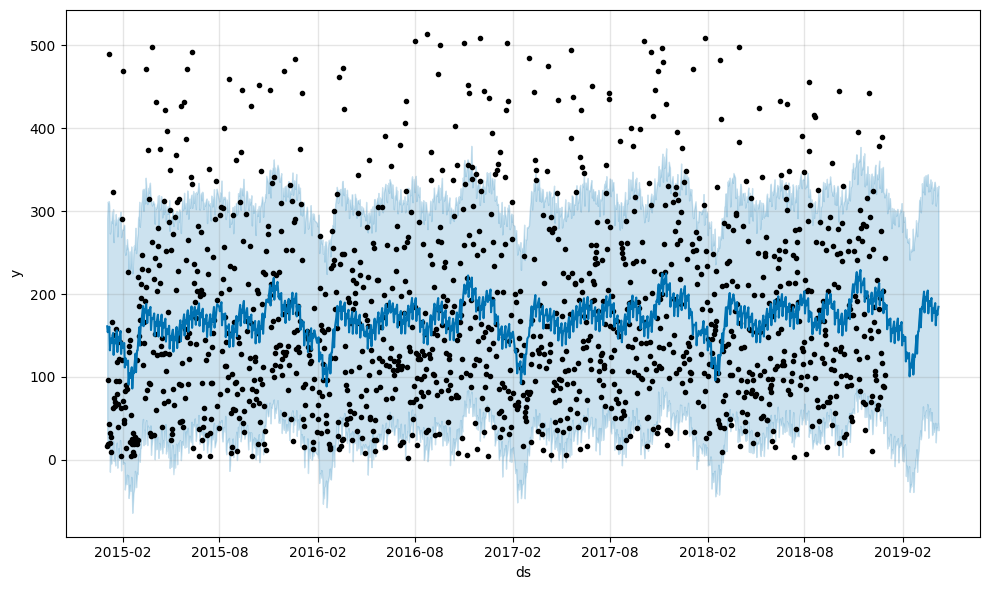

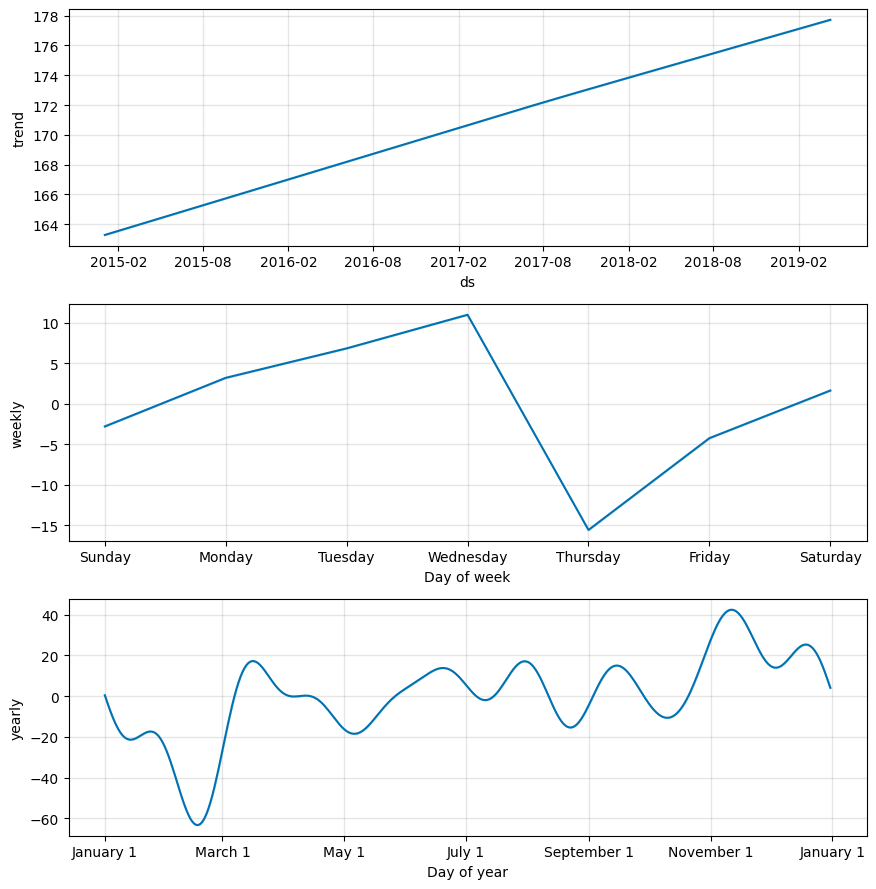

In [278]:
fig_forecast = m.plot(forecast)
fig_components = m.plot_components(forecast)
# fig_model = m.plot_parameters()

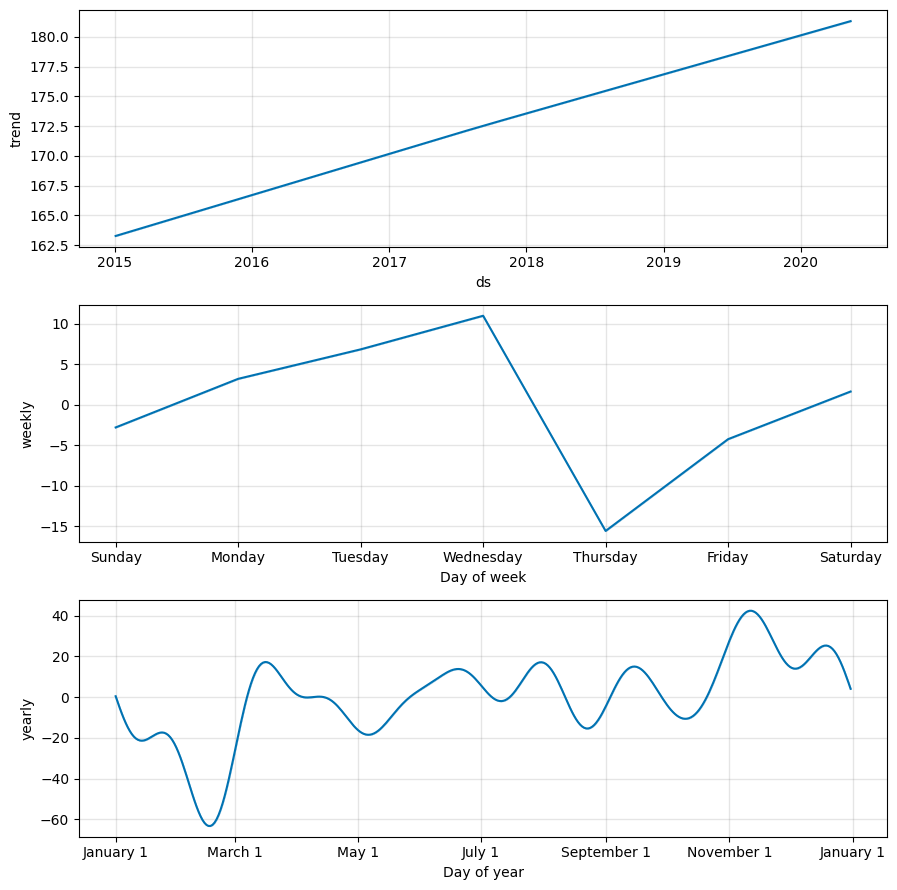

In [221]:
# fig2 = m.plot_components(forecast)

In [222]:
# from prophet.plot import plot_plotly, plot_components_plotly

# plot_plotly(m, forecast)